In [1]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
import generatevector
from preprocess.parse import getRootSuffix
from argparse import Namespace
from tqdm import tqdm
import time
import CrossValidation
import warnings

In [2]:
def svd(vectors, dim=10):
    svd = TruncatedSVD(n_components=dim, n_iter=10,random_state=2019)
    svd_vectors = svd.fit_transform(vectors)
    svd_exp_ratio = svd.explained_variance_ratio_
    svd_cum_exp = svd.explained_variance_ratio_.sum()
    print('Cumulated Explained Variance: {:.8f}'.format(svd_cum_exp))
    return svd_vectors, svd_exp_ratio, svd_cum_exp

In [3]:
args = Namespace(
        stop = False, 
        stem = False, 
        mime = False, 
        digit = False, 
        other = False
    )
vectors, labels, uni, filename, features = generatevector.vectoriser('tfidf', args)

In [4]:
# ReducedVector, ExplainedRatio, CumulatedVariance = svd(vectors, 2500)

## Reducted Dim matrix

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)



Finished model LogisticRegression on cornell validation set
Execution Time: 00:00:01
Classification performance on university set:
Accuracy: 0.792683
Precision:0.744397
Recall:0.792683
F1_Score:0.739177

Finished model LogisticRegression on texas validation set
Execution Time: 00:00:01
Classification performance on university set:
Accuracy: 0.800000
Precision:0.818836
Recall:0.800000
F1_Score:0.754669

Finished model LogisticRegression on washington validation set
Execution Time: 00:00:01
Classification performance on university set:
Accuracy: 0.826087
Precision:0.815761
Recall:0.826087
F1_Score:0.813240

Finished model LogisticRegression on wisconsin validation set
Execution Time: 00:00:01
Classification performance on university set:
Accuracy: 0.813559
Precision:0.776985
Recall:0.813559
F1_Score:0.794778
============================== Report overall cross validation performance ==============================
Accuracy: 0.810127
Precision:0.772172
Recall:0.810127
F1_Score:0.782953
Nor

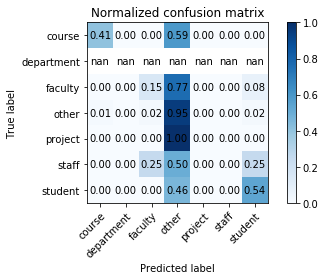

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import lightgbm as lgbm
import xgboost as xgb
warnings.filterwarnings("ignore")
seed = 2019
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# names = ["Logistic Regression", "Nearest Neighbors", "svm.LinearSVC", "Linear SVM", "RBF SVM",
#          "Decision Tree", "Random Forest", "LightGBM", "XgBoost"]
classifiers = [
    LogisticRegression(solver ='newton-cg') ]#,
#     SVC(kernel="linear", probability=False, random_state=seed),
#     RandomForestClassifier(max_depth=10, n_estimators=50,random_state=seed),
#     lgbm.LGBMClassifier()]
classes = ["course", "department", "faculty", "other", "project", "staff", "student"]
# args = Namespace(
#         stop = True, 
#         stem = True, 
#         mime = False, 
#         digit = True, 
#         other = True
#     )
# vectors, labels, uni, filename, features = generatevector.vectoriser('tfidf', args)
vec = vectors #ReducedVector[:, :2500]
for clf in classifiers:
    print('='*100)
    print('='*100)
    print('='*100)
    label_t, label_p = CrossValidation.CrossValidation(clf, vec, labels, uni, classes, partial_p=True, cfsm=True)

## Original Matrix

In [6]:
# for clf in classifiers:
#     print('='*100)
#     print('='*100)
#     print('='*100)
#     label_t, label_p = CrossValidation.CrossValidation(clf, vectors, labels, uni, classes, partial_p=True, cfsm=True)